# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('Alpaca/alpaca_keys.env')

True

In [3]:
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets

crypto_shares = {
    "btc": 1.2,
    "eth": 5.3,
}

my_btc = crypto_shares['btc']
my_eth = crypto_shares['eth']



In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price

## Submit request and format output
my_btc_request = requests.get(btc_url).json()

###print(json.dumps(my_btc_value, indent=4))
my_btc_value = my_btc_request['data']['1']['quotes']['USD']['price']
#print(my_btc_value)

#Fetch current ETH price 
my_eth_request = requests.get(eth_url).json()

#print(json.dumps(my_eth_request, indent=4))

my_eth_value = my_eth_request['data']['1027']['quotes']['USD']['price']

#print(my_eth_value)
# Compute current value of my crpto


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $54868.00
The current value of your 5.3 ETH is $2635.88


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
shares_data = {
    "shares": [200, 50]
}
my_agg = shares_data['shares'][0]
my_spy = shares_data['shares'][1]


In [8]:
# Set Alpaca API key and secret
#done

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [9]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-04-18", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-04-19", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
ticker_data.head()

AGG                                  SPY          \
                          open   high  low   close   volume    open    high   
time                                                                          
2021-04-19 00:00:00-04:00  114  114.5  114  114.44  4820664  416.26  416.74   

                                                     
                              low   close    volume  
time                                                 
2021-04-19 00:00:00-04:00  413.79  415.24  66226327

In [10]:
#clean data
df_closing_prices = pd.DataFrame()

df_closing_prices['AGG'] = ticker_data['AGG']['close']
df_closing_prices['SPY'] = ticker_data['SPY']['close']

df_closing_prices.index = df_closing_prices.index.date
df_closing_prices

,AGG,SPY
2021-04-19,114.44,415.24


In [11]:
# Compute the current value of shares
AGG_close = float(df_closing_prices['AGG'])
SPY_close = float(df_closing_prices['SPY'])

my_agg_value = AGG_close * my_agg
my_spy_value = SPY_close * my_spy



# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20762.00
The current value of your 200 AGG shares is $22888.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000.00

BTC_ETH_Value = my_btc_value + my_eth_value
Stock_Value = my_agg_value + my_spy_value

# Create savings DataFrame
df = {
    "Amount": {
        "Crypto": BTC_ETH_Value,
        "Stock": Stock_Value,
    }
    }

df_savings = pd.DataFrame(df, columns = ['Amount'], index = ['Crypto','Stock'])
df_savings



,Amount
Crypto,57503.88
Stock,43650.00


<AxesSubplot:ylabel='Amount'>

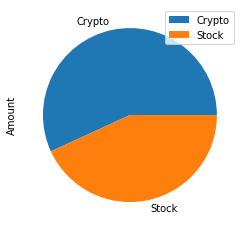

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount')

In [14]:
# Set ideal emergency fund
emergency_fund = (monthly_income * 3)

# Calculate total amount of savings
total_savings = (Stock_Value + BTC_ETH_Value)

difference = (total_savings - emergency_fund) * -1

#Validate saving health

if (total_savings > emergency_fund) :
    print(f'Congratulations for having ${total_savings} in your savings. You have enough emergency funds!')
elif (total_savings == emergency_fund) : 
       print(f'Congratulations on reaching your emergency fund goal of {emergency_fund}')
elif (total_savings < emergency_fund):
        print(f'You are {difference} dollars away from your emergency fund')
    

Congratulations for having $101153.88 in your savings. You have enough emergency funds!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-19', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

timeframe = "1D"

ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# 
ticker_data.head()



AGG                                       \
                             open      high      low    close   volume   
time                                                                     
2017-04-28 00:00:00-04:00  108.98  109.2500  108.910  109.250  2722695   
2017-05-01 00:00:00-04:00  108.86  108.9599  108.620  108.735  2335646   
2017-05-02 00:00:00-04:00  108.68  108.9400  108.679  108.890  2570794   
2017-05-03 00:00:00-04:00  108.97  108.9900  108.770  108.795  1765578   
2017-05-04 00:00:00-04:00  108.55  108.7000  108.550  108.665  1789624   

                              SPY                                       
                             open      high      low   close    volume  
time                                                                    
2017-04-28 00:00:00-04:00  238.90  238.9300  237.930  238.10  42264701  
2017-05-01 00:00:00-04:00  238.69  239.1700  238.195  238.65  38750688  
2017-05-02 00:00:00-04:00  238.84  238.9800  238.300  238.79  39563850  
2017-05-03 00:00:00-04:00  238.32  238.8775  237.700  238.52  47292627  
2017-05-04 00:00:00-04:00  238.83  238.9225  237.780  238.75  46170233

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
monte_closing_prices = pd.DataFrame()

monte_closing_prices["AGG"] = ticker_data["AGG"]["close"]
monte_closing_prices["SPY"] = ticker_data["SPY"]["close"]

monte_closing_prices.index = monte_closing_prices.index.date

monte_daily_returns = monte_closing_prices.pct_change().dropna()

monte_daily_returns.head()

,AGG,SPY
2017-05-01,-0.004714,0.002310
2017-05-02,0.001425,0.000587
2017-05-03,-0.000872,-0.001131
2017-05-04,-0.001195,0.000964
2017-05-05,0.000506,0.004063


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

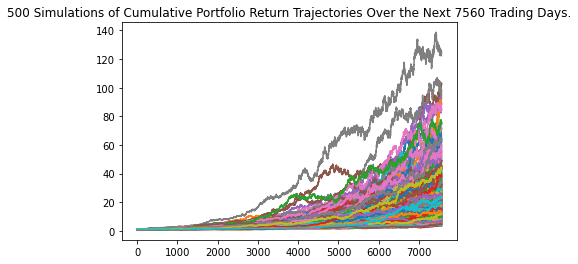

In [18]:

MC_port = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

line_plot = MC_port.plot_simulation()

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003335,1.004029,1.000640,1.005252,1.005900,1.013176,1.008932,0.993821,1.013958,1.016284,...,1.010477,0.997799,0.990175,1.003453,1.001220,1.003650,1.003383,1.013236,1.003817,0.998665
2,1.006483,1.002461,1.004381,1.002018,1.006750,1.008705,1.007806,0.998252,1.011249,1.009658,...,1.013684,0.990803,0.992405,1.008646,0.982811,1.018139,0.985877,1.003574,0.997820,1.006769
3,0.995675,1.005881,1.006097,0.996023,1.010118,1.010651,1.015375,0.988514,1.005115,1.018240,...,1.010549,0.980077,0.976081,1.012243,0.974612,1.021219,0.983170,1.017189,0.988635,0.995294
4,0.998822,1.014270,1.000943,0.994927,1.012984,1.013550,1.004535,0.988719,0.998509,1.015152,...,1.015915,0.989862,0.980674,1.022130,0.981466,1.025191,0.974426,1.024315,0.989433,0.975757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,18.651378,22.767828,28.206452,17.929093,31.919139,18.468537,14.290754,2.975633,11.818876,34.579928,...,11.807258,75.777740,17.402566,8.170900,4.243908,17.536351,25.525706,29.381900,27.516131,22.887282
7557,18.286660,22.775021,28.199185,18.005683,32.000332,18.582089,14.194560,3.000774,11.849110,34.491232,...,11.894802,75.092316,17.265340,8.081781,4.240567,17.192191,25.233154,29.166416,27.149627,22.946282
7558,18.148617,22.585239,28.612318,17.746799,32.128660,18.603047,14.211912,2.991303,11.775822,34.729778,...,11.935503,74.770062,17.367952,8.095173,4.227352,17.331883,24.815977,28.925366,27.203922,22.564275
7559,17.966726,22.141109,29.030140,17.958126,31.882482,18.777957,14.252727,3.012036,11.757493,34.831588,...,11.973530,74.674628,17.339449,8.130577,4.237781,17.640393,24.867909,29.228334,27.326703,22.824828


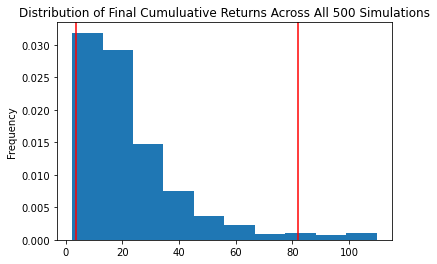

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_port.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_port.summarize_cumulative_return()

summary_stats
# Print summary statistics


count           500.000000
mean             23.407771
std              19.065081
min               2.313135
25%              10.813873
50%              17.624789
75%              28.754225
max             109.702011
95% CI Lower      3.765335
95% CI Upper     81.960320
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((summary_stats[8])*initial_investment,2)
ci_upper = round((summary_stats[9])*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $75306.69 and $1639206.4


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((summary_stats[8])*initial_investment,2)
ci_upper = round((summary_stats[9])*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $112960.04 and $2458809.6


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")